分类错误个数： 5
TP:104,FP:1,TN:141,FN:4
recall:0.963,precision:0.99,f1:0.977


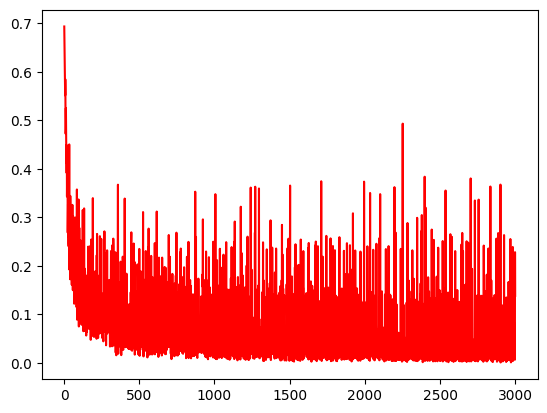

In [8]:
# Textbook: Principles and Practices of Machine Learning
# Alcohol dataset
# Author: Zhe Chen (ml_iot@163.com), 2021
import pandas
import numpy as np
import matplotlib.pyplot as plt
# load dataset
df = pandas.read_csv(r'E:\Study\Python\the_fourth_course\alcohol_dataset.csv')
data = np.array(df)
learning_rate=0.1
iteration=120
m_all=np.shape(data)[0]
m_train=250
m_test=m_all-m_train
d=np.shape(data)[1] - 1
batch_size=10
#特征缩放
x_mean=np.mean(data[:,:d],axis=0)
x_std=np.std(data[:,:d],axis=0,ddof=0)
data[:,:d]=(data[:,:d]-x_mean)/x_std
#划分测试集和训练集
rng=np.random.default_rng(1)
rng.shuffle(data,axis=0)
x_train=data[:m_train,:d].T
x_test=data[m_train:,:d].T
y_train=data[:m_train,d].reshape(1,-1)
y_test=data[m_train:,d].reshape(1,-1)
train_set=data[:m_train,:]

#训练参数
w=np.zeros((1,d)).reshape(-1,1)
b=0
cost_saved=[]
#训练
for i in range(iteration):
        rng.shuffle(train_set)
        for start_sample in range(0,m_train,batch_size):
            batch_sample=min([batch_size,m_train-start_sample])
            v=np.ones((1,batch_sample)).reshape(1,-1)
            X=train_set[start_sample:batch_sample+start_sample,:d].T
            Y=train_set[start_sample:batch_sample+start_sample,d].T
            z=np.dot(w.T,X)+b
            y_hat=1./(1+np.exp(-z)) 
            y_hat_ba=1-y_hat   
            y_train_ba=1-Y
            e=y_hat-Y
            w=w-learning_rate*np.dot(X,e.T)/batch_size
            b=b-learning_rate*np.dot(v,e.T)/batch_size
            cost=-(np.dot(np.log(y_hat),Y.T)+np.dot(np.log(y_hat_ba),y_train_ba.T))/batch_size
            '''cost值域为0-2'''
            cost_saved.append(cost.item(0))
z=(np.dot(w.T,x_train)+b)
y_hat=1/(1+np.exp(-z))
z=z>=0
errors=np.sum(np.abs(z-y_train))
print("分类错误个数：",errors.astype(int))
FP=np.sum(np.logical_and(y_train==0,z==1))
TP=np.sum(np.logical_and(y_train==1,z==1))
TN=np.sum(np.logical_and(y_train==0,z==0))
FN=np.sum(np.logical_and(y_train==1,z==0))
print(f'TP:{TP},FP:{FP},TN:{TN},FN:{FN}')
recall=TP/(TP+FN)
precision=TP/(TP+FP)
f1=2*recall*precision/(recall+precision)
print(f'recall:{recall:.3},precision:{precision:.3},f1:{f1:.3}')
#导入数据
plt.plot(range(1,len(cost_saved)+1),cost_saved,'r')
plt.show()